In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("deep")

In [38]:
cafe = pd.read_excel('Cafe_Data_MRA.xlsx')

In [39]:
cafe.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [40]:
cafe.tail()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
145825,2010-05-22,N0028716,ZINZI WHITE (GLS),21:43:55,2,150.0,78.0,0.0,378.0,LIQUOR
145826,2010-04-27,N0028343,ZINZI WHITE (GLS),20:52:11,2,150.0,78.0,0.0,378.0,LIQUOR
145827,2010-05-28,N0028835,ZINZI WHITE (GLS),01:03:37,3,150.0,117.0,0.0,567.0,LIQUOR
145828,2010-04-30,N0028399,ZINZI WHITE (GLS),23:44:37,1,150.0,39.0,0.0,189.0,LIQUOR
145829,2010-07-09,N0029472,ZINZI WHITE (BTL),00:31:51,1,700.0,182.0,0.0,882.0,LIQUOR


In [41]:
cafe.isnull().sum()

Date            0
Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [42]:
cafe.shape

(145830, 10)

In [43]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [90]:
cafe.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,145830.0,1.121299,0.477237,1.00,1.00,1.00,1.0,30.00
Rate,145830.0,161.782259,102.244631,0.01,95.00,125.00,225.0,2100.00
Tax,145830.0,48.929061,40.272851,0.00,22.56,32.06,72.0,2731.25
Discount,145830.0,0.095079,3.720735,0.00,0.00,0.00,0.0,825.00
Total,145830.0,224.959852,164.960776,0.01,117.56,167.06,315.0,14231.25


<AxesSubplot:ylabel='Total'>

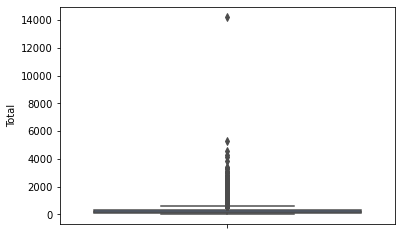

In [45]:
sns.boxplot(data=cafe,y='Total')

df_num = df.select_dtypes(['int64','float64'])
df_cat = df.select_dtypes(['object'])

In [47]:
df_num = cafe.select_dtypes(['int64','float64'])
df_cat = cafe.select_dtypes(['object'])

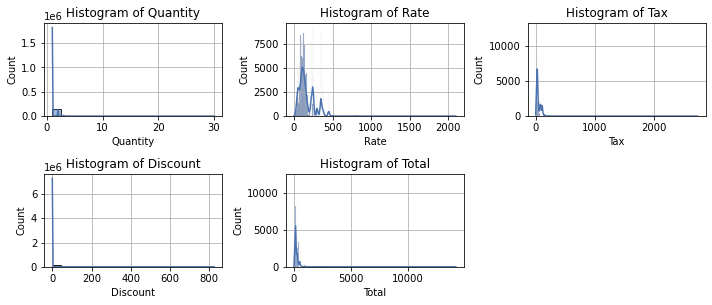

In [48]:
plt.figure(figsize=(10,6))
for i in range(len(df_num.columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df_num, x=df_num.columns[i], kde=True)
    plt.grid(True)
    plt.title(f'Histogram of {df_num.columns[i]}')
    plt.tight_layout()
    i+=1

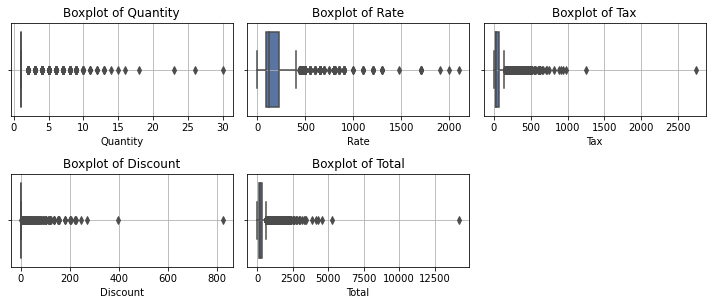

In [49]:
plt.figure(figsize=(10,6))
for i in range(len(df_num.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df_num, x=df_num.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {df_num.columns[i]}')
    plt.tight_layout()
    i+=1

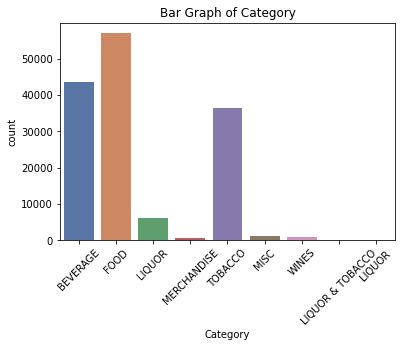

In [69]:
sns.countplot(data=cafe, x=cafe['Category']);
plt.title(f'Bar Graph of Category')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Rate', ylabel='Count'>

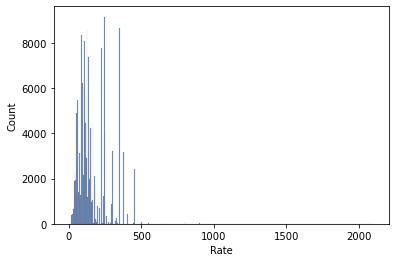

In [58]:
sns.histplot(data=cafe, x = cafe['Rate'])

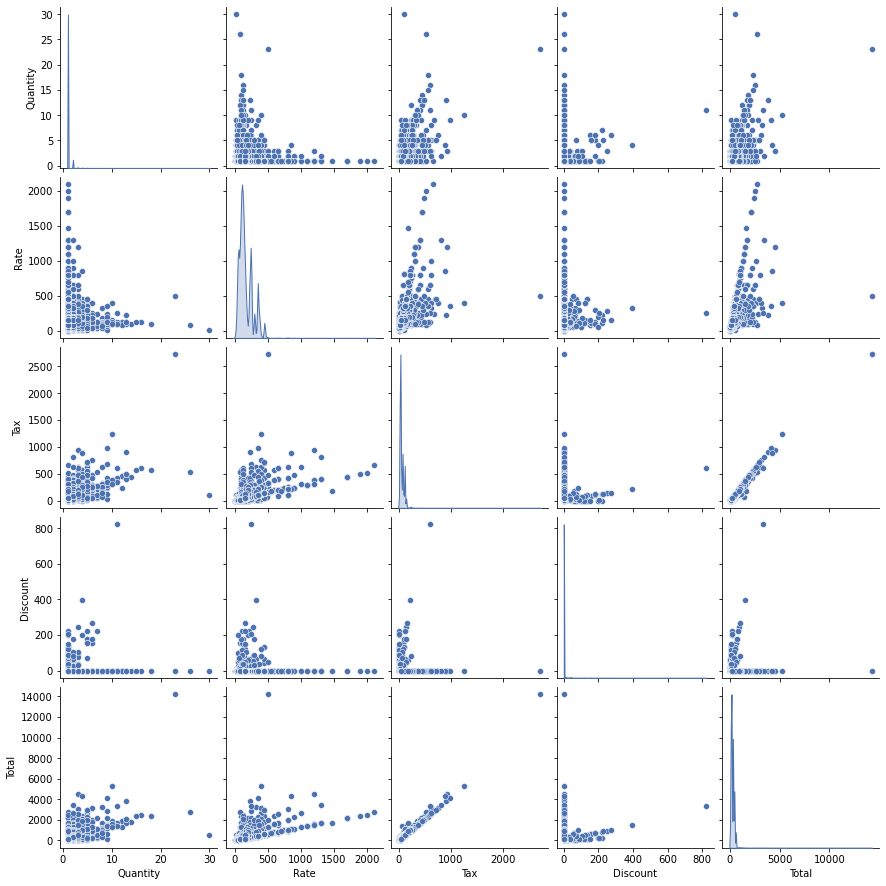

In [68]:
sns.pairplot(data=cafe, diag_kind='kde');

In [70]:
cafe.Category.value_counts()

FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6200
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
LIQUOR                  1
Name: Category, dtype: int64

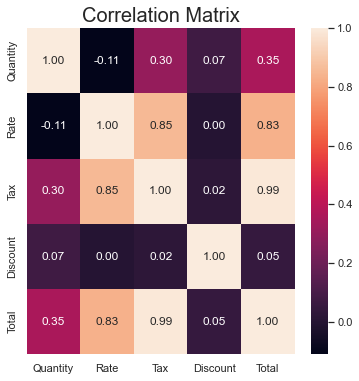

In [72]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(cafe.corr(), annot=True, fmt='.2f');
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [76]:
max(cafe.Date)

Timestamp('2011-03-31 00:00:00')

In [82]:
cafe['Item Desc'].nunique()

580